<a href="https://colab.research.google.com/github/gaurav0910/gaurav0910/blob/main/AC_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AC DATA Analysis:**

---



---



INTRODUCTION:

This dataset is about power consumed by 18 different AC's of different hotels in Gurgaon. Now we will clean the data and analyse for further analysis and find new findings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import plotly.express as px

In [ ]:
file_df = pd.read_csv("C:/Users/91706/Downloads/AC_Data.csv")
file_df.head(10)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
5,2019-08-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
7,2019-08-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
9,2019-08-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Rows & Columns of the dataframe

file_df.shape

(87840, 19)

In [ ]:
# Dropping the Empty rows

drop_empty_rows_df = file_df.dropna(axis=0,how='any',inplace=True)
drop_empty_rows_df

In [ ]:
file_df.shape

(34642, 19)

Now after removing all the empty rows we have 34642 rows left instead of 87840.

In [ ]:
file_df.head(10)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
10,2019-08-01 00:10:00,6.567156,9.037213,1.473477,0.284310,1.993010,3.910083,2.493377,5.169652,3.125476,1.900643,2.398804,2.503357,3.114851,2.774171,6.068003,2.497199,3.063759,5.805874
12,2019-08-01 00:12:00,6.453244,9.044919,1.829450,1.682536,1.887994,3.290534,2.384930,4.976252,3.097164,1.908729,2.302548,2.572876,3.102615,2.776231,6.450241,3.079120,3.089316,6.246021
14,2019-08-01 00:14:00,6.465478,9.090386,1.855697,2.259675,1.810324,3.510855,2.965181,4.956650,3.124932,2.183731,1.906641,2.391689,4.289458,3.495441,6.365123,3.017883,3.140137,6.273877
18,2019-08-01 00:18:00,6.368224,8.158823,2.839488,2.301862,2.811552,3.514442,3.300419,4.392541,3.096956,3.505346,1.885703,2.226469,4.367508,5.122032,6.328834,3.366155,3.501677,6.745517
20,2019-08-01 00:20:00,6.518812,7.962736,2.736410,1.887470,2.580264,3.852544,3.226622,4.614456,3.066071,3.430041,1.799723,2.431497,4.023512,5.179115,6.204670,3.280784,3.549387,7.077375


In [ ]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34642 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       34642 non-null  object 
 1   AC 1    34642 non-null  float64
 2   AC 2    34642 non-null  float64
 3   AC 3    34642 non-null  float64
 4   AC 4    34642 non-null  float64
 5   AC 5    34642 non-null  float64
 6   AC 6    34642 non-null  float64
 7   AC 7    34642 non-null  float64
 8   AC 8    34642 non-null  float64
 9   AC 9    34642 non-null  float64
 10  AC 10   34642 non-null  float64
 11  AC 11   34642 non-null  float64
 12  AC 12   34642 non-null  float64
 13  AC 13   34642 non-null  float64
 14  AC 14   34642 non-null  float64
 15  AC 15   34642 non-null  float64
 16  AC 16   34642 non-null  float64
 17  AC 17   34642 non-null  float64
 18  AC 18   34642 non-null  float64
dtypes: float64(18), object(1)
memory usage: 5.3+ MB


In [ ]:
file_df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000
mean,2.394089,3.872065,2.504698,2.313283,1.466444,2.709061,2.945136,2.568989,3.149919,1.539393,2.486162,2.815970,4.313004,2.957060,4.124136,2.765703,4.255119,6.453815
std,2.309156,2.360155,1.452713,1.705811,0.748515,1.590249,1.487934,1.531968,1.534838,0.700372,1.588902,1.402622,1.872007,1.505043,2.003805,1.538245,1.078238,2.249975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.272895,1.663072,1.279719,1.008326,1.877316,2.161931,1.766606,2.273552,1.106887,1.640117,2.066214,3.273092,1.855093,3.025756,1.867401,3.773065,4.006869
50%,2.081296,3.738743,2.417197,2.255593,1.408948,2.819162,2.976191,2.622136,3.046702,1.500257,2.409043,2.824786,4.239078,2.794645,4.092966,2.685934,4.624716,7.072846
75%,3.767716,5.334570,3.351791,3.313595,1.903034,3.742868,3.852767,3.538364,4.046424,1.977836,3.362753,3.660599,5.433044,3.892646,5.409613,3.701203,4.977744,8.252815
max,11.194789,11.147141,8.430909,9.849144,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,9.789502,5.950261,11.040031


In [ ]:
# Renaming the column name:

file_df.rename(columns={'0': 'Date-Time'},inplace=True)

In [ ]:
file_df.head()

,Date-Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [ ]:
# Checking for NaN values:

file_df.isnull().any()

Date-Time    False
AC 1         False
AC 2         False
AC 3         False
AC 4         False
AC 5         False
AC 6         False
AC 7         False
AC 8         False
AC 9         False
AC 10        False
AC 11        False
AC 12        False
AC 13        False
AC 14        False
AC 15        False
AC 16        False
AC 17        False
AC 18        False
dtype: bool

In [ ]:
# Sum of NaN values

file_df.isnull().sum()

Date-Time    0
AC 1         0
AC 2         0
AC 3         0
AC 4         0
AC 5         0
AC 6         0
AC 7         0
AC 8         0
AC 9         0
AC 10        0
AC 11        0
AC 12        0
AC 13        0
AC 14        0
AC 15        0
AC 16        0
AC 17        0
AC 18        0
dtype: int64

Zero NaN values in the DataFrame.

In [ ]:
# Rounding the decimal places to 3 places
new_df = file_df.round(3)
new_df

,Date-Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.519,8.788,0.000,0.000,2.617,4.079,2.782,4.624,5.222,2.151,1.585,0.560,3.143,2.749,5.418,4.113,3.305,6.736
2,2019-08-01 00:02:00,7.426,8.941,0.000,0.000,2.582,3.781,2.529,5.057,5.349,2.415,2.168,1.819,3.085,2.720,3.302,3.986,3.221,6.379
4,2019-08-01 00:04:00,7.053,9.161,0.000,0.000,2.592,3.800,2.332,6.323,3.995,2.237,3.346,2.310,3.133,2.677,3.539,3.798,3.132,6.363
6,2019-08-01 00:06:00,6.665,9.066,0.000,0.000,2.576,3.773,2.596,5.805,3.554,1.878,2.738,2.511,3.090,2.667,4.607,3.063,3.064,6.127
8,2019-08-01 00:08:00,6.675,9.096,0.000,0.000,2.021,3.156,2.845,6.315,3.042,1.915,2.452,2.172,3.097,2.711,5.333,2.640,2.865,5.662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87831,2019-09-30 23:51:00,0.000,6.090,2.323,1.423,0.000,0.000,3.730,3.747,3.578,1.714,5.146,3.253,2.464,2.830,3.694,1.992,3.029,7.203
87833,2019-09-30 23:53:00,0.000,6.047,2.196,1.861,0.813,0.000,3.666,3.018,3.600,1.548,4.380,3.145,3.046,2.693,4.091,1.945,3.049,7.348
87835,2019-09-30 23:55:00,0.000,6.122,2.192,2.083,1.046,0.000,3.668,3.006,3.614,1.861,5.020,3.154,3.648,2.440,4.063,1.854,3.028,7.260
87837,2019-09-30 23:57:00,1.209,6.153,2.211,0.000,1.448,0.000,3.151,2.872,3.418,2.185,5.174,2.772,3.787,2.060,4.058,1.871,2.992,7.135


In [ ]:
# Sum of power consumption of all AC's:   


total_power_df = new_df[['AC 1','AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6','AC 7', 'AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18']].sum().to_frame('Total power consumption').reset_index()
total_power_df

,index,Total power consumption
0,AC 1,82936.040
1,AC 2,134136.064
2,AC 3,86767.668
3,AC 4,80136.717
4,AC 5,50800.635
5,AC 6,93847.243
6,AC 7,102025.401
7,AC 8,88994.902
8,AC 9,109119.504
9,AC 10,53327.657


In [ ]:
# Top 5 AC's with highest power consumption:

top_5_df_max = total_power_df.sort_values('Total power consumption', ascending=False)
top_5_df_max.head()

,index,Total power consumption
17,AC 18,223573.079
12,AC 13,149411.172
16,AC 17,147405.798
14,AC 15,142868.350
1,AC 2,134136.064


**AC 18 has consumed the most power among all other hotels AC followed by AC 13,AC 17 etc.**

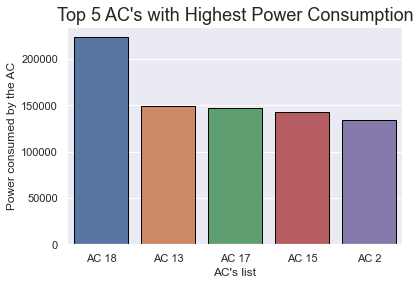

In [ ]:
# Plotting the graph:

ax = sns.barplot(data=top_5_df_max.head(), x="index", y ="Total power consumption", edgecolor="black")

plt.title("Top 5 AC's with Highest Power Consumption", size=18)
plt.ylabel("Power consumed by the AC")
plt.xlabel("AC's list")
plt.show()

## Plotting the power consumption of All AC's:

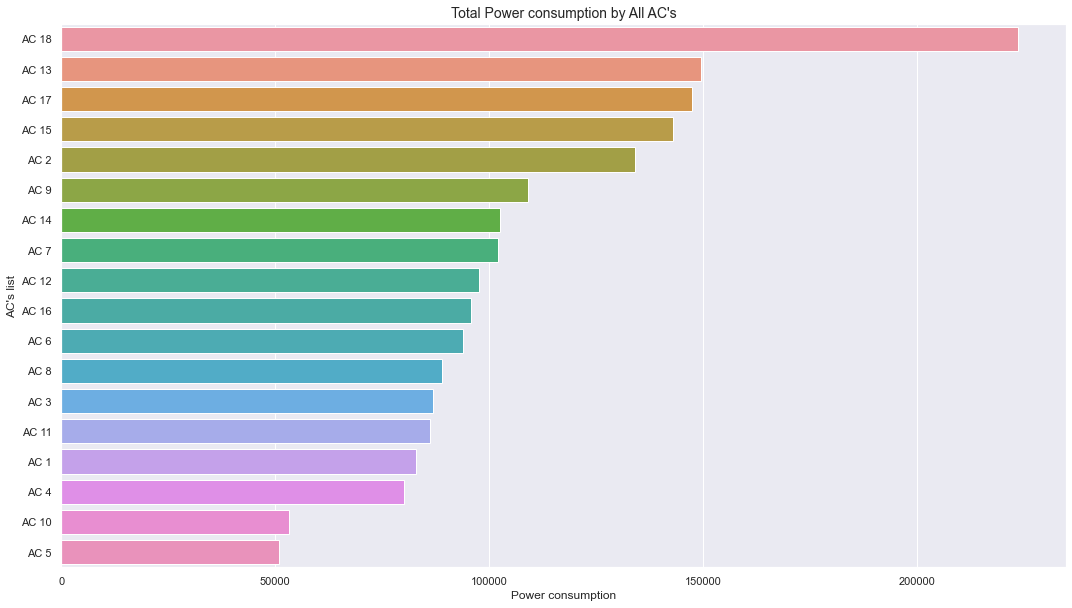

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.barplot(data=top_5_df, x="Total power consumption", y="index", edgecolor="white")

plt.title("Total Power consumption by All AC's", size=14)
plt.ylabel("AC's list")
plt.xlabel("Power consumption")
plt.show()

In [ ]:
# AC with least power consumption:
top_5_df_min = total_power_df.sort_values('Total power consumption', ascending=True)
top_5_df_min.head(5)

,index,Total power consumption
4,AC 5,50800.635
9,AC 10,53327.657
3,AC 4,80136.717
0,AC 1,82936.040
10,AC 11,86125.584


**AC 5 has been used the least among all the AC's.**

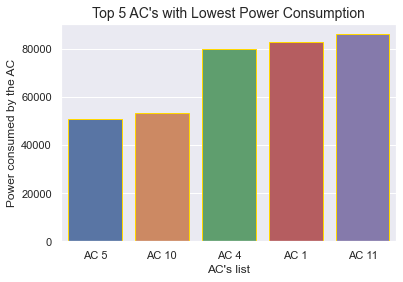

In [ ]:
# Plotting the graph:

ax = sns.barplot(data=top_5_df_min.head(5), x="index", y ="Total power consumption", edgecolor="gold")

plt.title("Top 5 AC's with Lowest Power Consumption", size=14)
plt.ylabel("Power consumed by the AC")
plt.xlabel("AC's list")
plt.show()

In [ ]:
# Mean of AC's:

mean_df = new_df[['AC 1','AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6','AC 7', 'AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18']].mean().to_frame("Mean")
mean_df

,Mean
AC 1,2.394089
AC 2,3.872065
AC 3,2.504696
AC 4,2.313282
AC 5,1.466446
AC 6,2.709060
AC 7,2.945136
AC 8,2.568989
AC 9,3.149919
AC 10,1.539393


Text(0.5, 1.0, "Top 3 most used AC's")

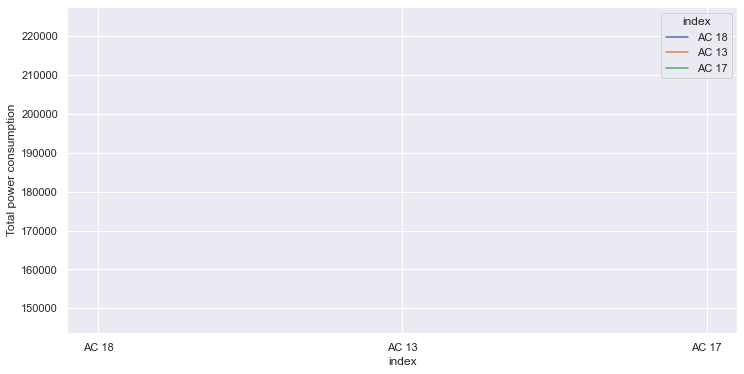

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(data = top_5_df_max[top_5_df_max['index'].isin(['AC 18','AC 13','AC 17'])], x = 'index', y='Total power consumption', hue='index')
ax.set_title("Top 3 most used AC's", size=16)